# Group Project

In [4]:
library(tidyverse) 
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

In [5]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
download.file(players_url, "players.csv")
players_data <- read_csv("players.csv")

players_data_edit <- players_data |> 
    select(experience, played_hours, gender, age) 

# sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
# download.file(sessions_url, "sessions.csv")
# sessions_data <- read_csv("sessions.csv")

# sessions_data_edit <- sessions_data |>
    # select(start_time, end_time, original_start_time, original_end_time)

players_data_edits <- players_data_edit |>
    filter(played_hours > 0) |>
    mutate(log_scaled_hours = log(played_hours))

players_data_edits

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,played_hours,gender,age,log_scaled_hours
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Pro,30.3,Male,9,3.4111477
Veteran,3.8,Male,17,1.3350011
Amateur,0.7,Female,21,-0.3566749
Regular,0.1,Male,21,-2.3025851
Amateur,0.1,Male,17,-2.3025851
Veteran,1.6,Female,23,0.4700036
Beginner,1.5,Female,25,0.4054651
Amateur,0.2,Male,22,-1.6094379
Amateur,48.4,Female,17,3.8794998


In [6]:
players_data_edits <- players_data_edits |>
  mutate(
    gender = as.factor(gender),
    experience = as.factor(experience)
  )

ERROR: Error in eval(expr, envir, enclos): object 'players_train_data' not found


In [7]:
players_data_split <- initial_split(players_data_edits, prop = 0.75, strata = played_hours) 
players_train_data <- training(players_data_split)
players_test_data <- testing(players_data_split)
players_train_data <- players_train_data |>
  drop_na()
players_data_edits

experience,played_hours,gender,age,log_scaled_hours
<fct>,<dbl>,<fct>,<dbl>,<dbl>
Pro,30.3,Male,9,3.4111477
Veteran,3.8,Male,17,1.3350011
Amateur,0.7,Female,21,-0.3566749
Regular,0.1,Male,21,-2.3025851
Amateur,0.1,Male,17,-2.3025851
Veteran,1.6,Female,23,0.4700036
Beginner,1.5,Female,25,0.4054651
Amateur,0.2,Male,22,-1.6094379
Amateur,48.4,Female,17,3.8794998


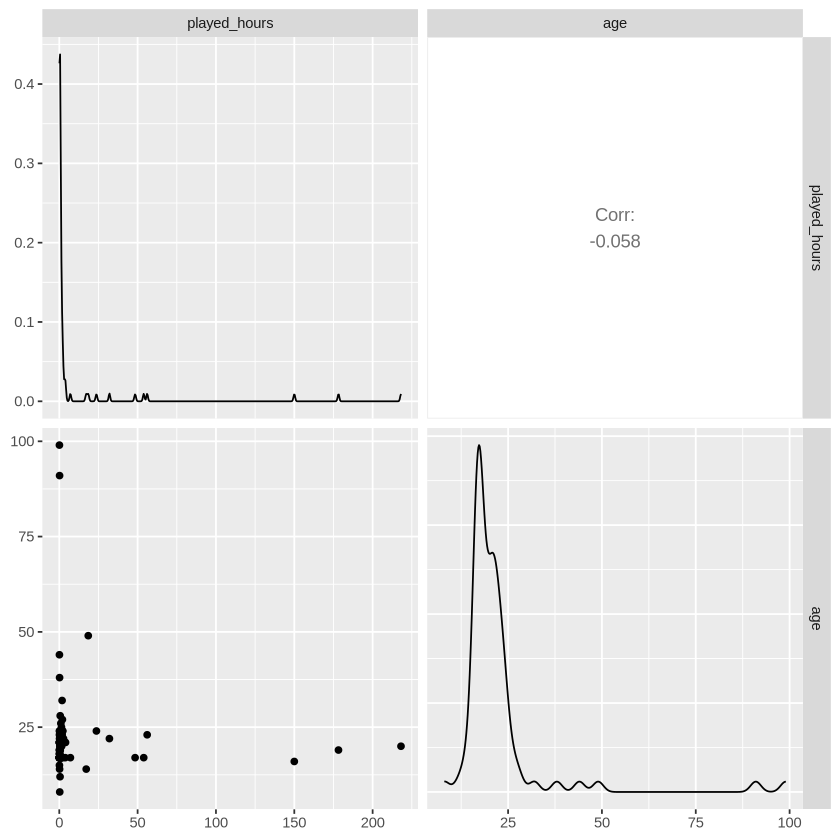

In [8]:
ggpairs(
  players_train_data,
  columns = c("played_hours", "age")
)

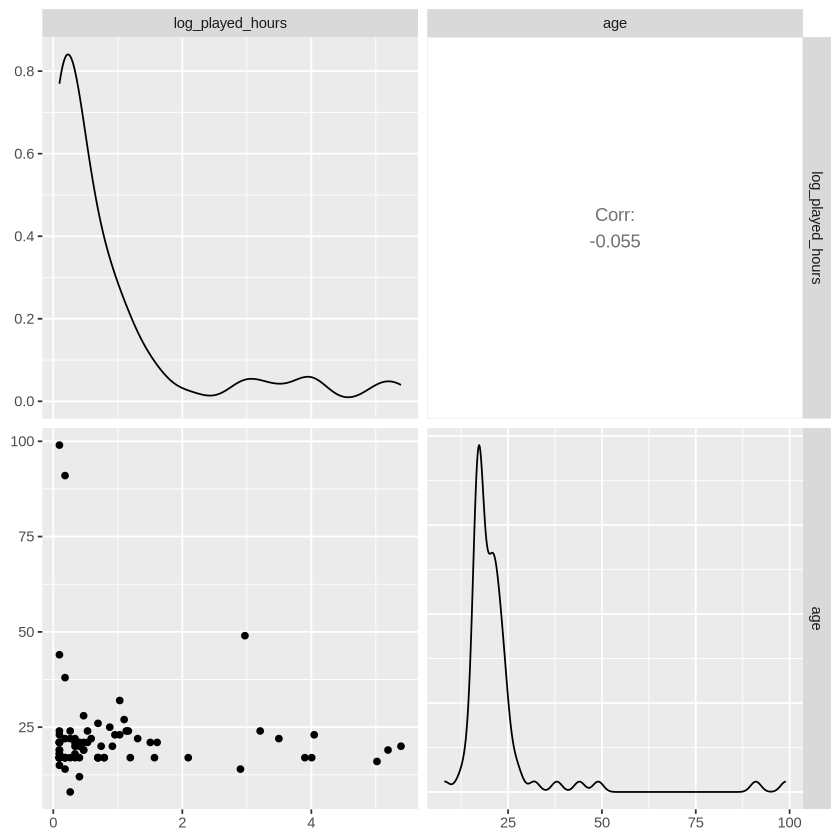

In [9]:
#players_train_data <- players_train_data |>
#  mutate(played_hours_z = (played_hours - mean(played_hours)) / sd(played_hours))
players_train_data <- players_train_data |>
  mutate(log_played_hours = log(played_hours + 1)) #tried standardising 
ggpairs(
  players_train_data,
  columns = c("log_played_hours", "age")
)

In [10]:
lm_spec <- linear_reg() %>%
  set_engine("lm")
players_data_recipe <- recipe(played_hours ~ age + gender + 
                              experience, data = players_train_data)
print(lm_spec)
print(players_data_recipe)


Linear Regression Model Specification (regression)

Computational engine: lm 





── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



In [12]:
players_workflow <- workflow() |>
  add_recipe(players_data_recipe) |>
  add_model(lm_spec) |>
fit(data = players_train_data)
players_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)                      age               genderMale  
                31.9691                  -0.1599                 -21.3817  
       genderNon-binary              genderOther  genderPrefer not to say  
                30.1327                  -9.8894                 -15.5659  
     genderTwo-Spirited       experienceBeginner            experiencePro  
               -29.0760                 -10.6996                  -7.3250  
      experienceRegular        experienceVeteran  
                13.2670                 -14.9591  
